In [1]:
#Llamar al dataloader
%run DataLoader.ipynb


In [9]:
dataset

,keyword,location,text,target,longitud
id,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True,69
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True,38
5,NaN,NaN,All residents asked to 'shelter in place' are ...,True,133
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True,65
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88
...,...,...,...,...,...
10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,True,83
10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,True,125
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,True,65


In [30]:

top_keywords = list(dataset.groupby('keyword').agg({'target':'count'}).nlargest(20, 'target').reset_index().keyword)
top_keywords

['fatalities',
 'armageddon',
 'deluge',
 'body%20bags',
 'damage',
 'harm',
 'sinking',
 'collided',
 'evacuate',
 'fear',
 'outbreak',
 'siren',
 'twister',
 'windstorm',
 'collision',
 'derailment',
 'earthquake',
 'explosion',
 'famine',
 'flames']

In [32]:
dataset.loc[(dataset['keyword'].isin (top_keywords)),:]

,keyword,location,text,target,longitud
id,,,,,
446,armageddon,"California, United States",#PBBan (Temporary:300) avYsss @'aRmageddon | D...,False,91
447,armageddon,"California, United States",#PBBan (Temporary:300) Russaky89 @'aRmageddon ...,False,94
448,armageddon,#FLIGHTCITY UK,((OFFICIAL VID)) #DoubleCups &gt;&gt; https://...,False,120
450,armageddon,NaN,ouvindo Peace Love &amp; Armageddon,False,35
451,armageddon,NaN,Best movie you've ever seen? - Armageddon htt...,False,65
...,...,...,...,...,...
10580,windstorm,(a) property of the universe,the windstorm blew thru my open window and now...,False,132
10581,windstorm,Chicago,'My Fifty Online Dates and why I'm still singl...,False,140
10582,windstorm,Home is where we park it!,@rangerkaitimay had major windstorm thunder an...,True,92


In [36]:
grouped = dataset.loc[(dataset['keyword'].isin(top_keywords)),:]
grouped = grouped.groupby(['keyword', 'longitud']).agg({'target':'count'}).reset_index()
grouped.columns = ['keyword', 'longitud', 'Cantidad']
grouped.dropna(inplace=True)
grouped

,keyword,longitud,Cantidad
0,armageddon,27,1
1,armageddon,34,1
2,armageddon,35,1
3,armageddon,41,1
4,armageddon,44,1
...,...,...,...
577,windstorm,136,3
578,windstorm,137,1
579,windstorm,138,1
580,windstorm,140,2


In [43]:
heatmap_data = pd.pivot_table(grouped, values='Cantidad', 
                     index=['keyword'], 
                     columns='longitud')
heatmap_data = heatmap_data.fillna(0)
heatmap_data

longitud,18,19,20,23,24,25,26,27,29,32,...,137,138,139,140,141,142,143,144,146,148
keyword,,,,,,,,,,,,,,,,,,,,,
armageddon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
body%20bags,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
collided,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
collision,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
damage,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
deluge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0
derailment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
earthquake,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
evacuate,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


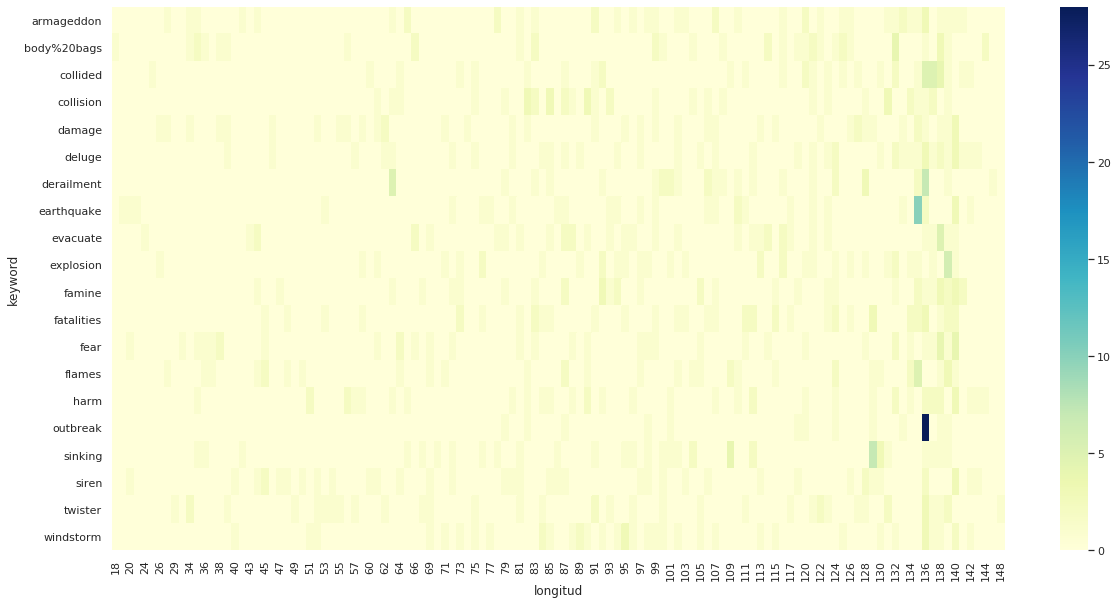

In [46]:
sns.heatmap(heatmap_data, cmap="YlGnBu")